In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as sts
from scipy.stats import norm
from scipy.stats import t

In [4]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\DS1_C8_Computers_Data_Project.csv')
data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [6]:
data.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [52]:
# Task 1:

# Total number of entries
n = len(data)

# Probability of purchase based on specifications
a = data[data['ram'] >= 8]
b = a[a['screen'] == 14]
c = b[b['speed'] > 33]
prob_1 = len(c) / n
print(prob_1)

# Probability of selling a premium computer
d = data[data["premium"] == "yes"]
prob_2 = len(d) / n
print(prob_2)

# Conditional Probability: P(A given B) = P(A|B) = P(A and B) / P(B)
# P(CD = yes | Premium = yes) = P(CD = yes AND Premium = yes) / P(Premium = yes)
e = d[d["cd"] == "yes"]
prob_3 = len(e) / len(d)
print(prob_3)

# P(Screen > 15 AND Premium)
f = data[(data["screen"] > 15) & (data["premium"] == "yes")]
prob_4 = len(f) / n
print(prob_4)

# P(Screen ≤ 14 | Not Premium) = P(Screen ≤ 14 AND Not Premium) / P(Not Premium)
g = data[data["premium"] == "no"]
h = g[g["screen"] <= 14]
prob_5 = len(h) / len(g)
print(prob_5)

# P(CD = yes AND Multimedia Kit = yes)
i = data[(data["cd"] == "yes") & (data["multi"] == "yes")]
prob_6 = len(i) / n
print(prob_6)

# P(Multimedia Kit = yes | CD = yes) = P(Multimedia Kit = yes AND CD = yes) / P(CD = yes)
j = data[data["cd"] == "yes"]
k = j[j["multi"] == "yes"]
prob_7 = len(k) / len(j)
print(prob_7)

0.16024924109282632
0.9022208020450552
0.5000885425889853
0.08467806358843266
0.6911764705882353
0.1394791500239655
0.3002063273727648


In [74]:
# Task 2 (a)
avg_comp = data["price"].mean()
print(avg_comp)

2219.576609682058


In [147]:
# Task 2 (c)
data_prem_filter = data[data["premium"] == "yes"]
avg_prem = data_prem_filter["price"].mean()
print(avg_prem)

data_non_prem_filter = data[data["premium"] == "no"]
avg_non_prem = data_non_prem_filter["price"].mean()
print(avg_non_prem)

2204.148397379139
2361.9346405228757


In [149]:
# # Task 2 (b & c): Simple Random Sampling

rand_sample = data.sample(n=100, random_state=42)

avg_rand_sample = rand_sample["price"].mean()
print(avg_rand_sample)

data_rand_sample_yes = rand_sample[rand_sample["premium"] == "yes"]
avg_rand_sample_yes = data_rand_sample_yes["price"].mean()
print(avg_rand_sample_yes)

data_rand_sample_no = rand_sample[rand_sample["premium"] == "no"]
avg_rand_sample_no = data_rand_sample_no["price"].mean()
print(avg_rand_sample_no)


2304.4
2297.703296703297
2372.1111111111113


In [151]:
# # Task 2 (b & c): Systematic Sampling

n = 100  # sample size
my_rows = len(data) // 100  # Adjusting for 100 samples
systematic_sample = data.iloc[::my_rows].head(100)

avg_sys_sample = systematic_sample["price"].mean()
print(avg_sys_sample)

data_sys_sample_yes = systematic_sample[systematic_sample["premium"] == "yes"]
avg_sys_sample_yes = data_sys_sample_yes["price"].mean()
print(avg_rand_sample_yes)

data_sys_sample_no = systematic_sample[systematic_sample["premium"] == "no"]
avg_sys_sample_no = data_rand_sample_no["price"].mean()
print(avg_sys_sample_no)


2208.77
2297.703296703297
2372.1111111111113


In [153]:
# # Task 2 (b & c): Stratified Sampling

samples = []
grouped_df = data.groupby("premium")
for group_name, group_data in grouped_df:
    sample_data = group_data.sample(frac=0.016, random_state=42)
    samples.append(sample_data)
strat_sample_df = pd.concat(samples, ignore_index=True)

avg_strat_sample = strat_sample_df["price"].mean()
print(avg_strat_sample)

data_strat_sample_yes = strat_sample_df[strat_sample_df["premium"] == "yes"]
avg_strat_sample_yes = data_strat_sample_yes["price"].mean()
print(avg_strat_sample_yes)

data_strat_sample_no = strat_sample_df[strat_sample_df["premium"] == "no"]
avg_strat_sample_no = data_strat_sample_no["price"].mean()
print(avg_strat_sample_no)


2231.01
2237.088888888889
2176.3


In [157]:
# Task 2 (b & c): Cluster Sampling

prem_group = data.groupby("premium")  # Grouping by 'premium'
clusters = ["yes", "no"]
my_list = []  # Make sure this matches
for i in clusters:
    cluster_data = prem_group.get_group(i)
    sample_data = cluster_data.sample(frac=0.016, random_state=4)
    my_list.append(sample_data)  # Use correct variable name
cluster_sample_df = pd.concat(my_list, ignore_index=True)  # Concatenate the sampled clusters

# Overall cluster sample average price
avg_cluster_sample = cluster_sample_df["price"].mean()
print(avg_cluster_sample)

# Premium and Non-Premium average prices in a cluster sample
data_cluster_sample_yes = cluster_sample_df[cluster_sample_df["premium"] == "yes"]
avg_cluster_sample_yes = data_cluster_sample_yes["price"].mean()
print(avg_cluster_sample_yes)

data_cluster_sample_no = cluster_sample_df[cluster_sample_df["premium"] == "no"]
avg_cluster_sample_no = data_cluster_sample_no["price"].mean()
print(avg_cluster_sample_no)


2207.76
2169.766666666667
2549.7


In [122]:
# Interpretation (Task 2 (b & c)):
# Sample means vary slightly depending on the technique. stratified and cluster sampling come closest to the population average, which is expected as it maintains the premium/non-premium ratio.

In [124]:
# Task 2 (d): Interpretations:

# In the full dataset, non-premium computers surprisingly have a higher average price than premium ones.

# In the sampled data, this pattern remains, though both categories appear slightly more expensive in the sample.

# This indicates sampling variation, but overall non-premium computers are more expensive on average, which might be due to fewer non-premium units being high-end or having exceptional specs driving up their average.

# Stratified and cluster sampling provided a closer estimate to the real population average, as it preserved the balance between premium and non-premium classes.

C:\Users\rathi\AppData\Local\Temp\ipykernel_43752\1022684607.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_s[k],ax=ax[i, j])
C:\Users\rathi\AppData\Local\Temp\ipykernel_43752\1022684607.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_s[k],ax=ax[i, j])
C:\Users\rathi\AppData

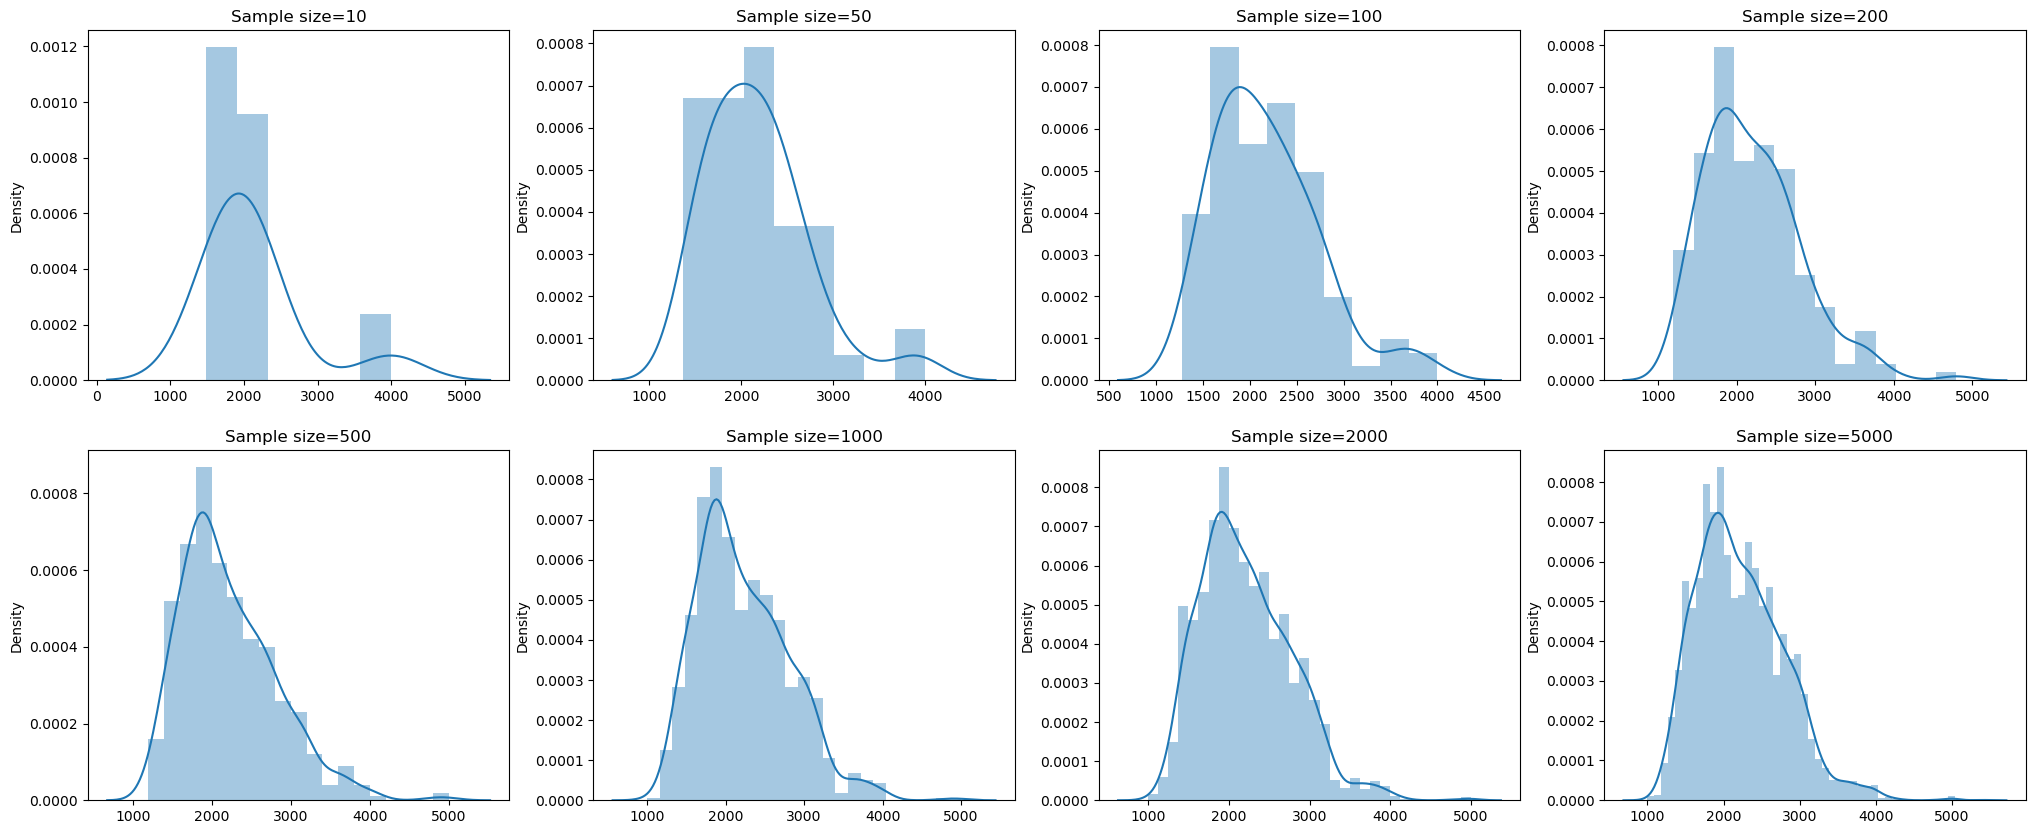

[2126.7, 2172.2, 2181.61, 2202.775, 2212.25, 2227.662, 2213.7805, 2221.2752]


In [171]:
# Task 3 (a): Draw distribution plots to test for different sample sizes

num = [10, 50, 100, 200, 500, 1000, 2000, 5000] 
data_s = []
data_s_mean = []
sample_df = pd.DataFrame()

fig, ax = plt.subplots(2, 4, figsize=(25, 10))
for i in num:
    sample_df=data.sample(n=i, random_state=1, replace=True) 
    data_s.append(sample_df["price"].tolist())
    data_s_mean.append(sample_df["price"].mean())
    
k=0
for i in range(0, 2):
    for j in range(0, 4):
        sns.distplot(data_s[k],ax=ax[i, j])
        ax[i, j].set_title(label = 'Sample size='+str(len(data_s[k])))
        k = k + 1
plt.show()
print(data_s_mean)

In [145]:
# Interpretations (Task 3):

# (a) As sample size increases, the variability of sample means decreases.

# (b) The distribution of sample means becomes more normal as sample size increases, even if the original population is right skewed.

# (c) The sample means center around the population mean, and their spread approximates σ/sqrt(n), satisfying the CLT.